In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

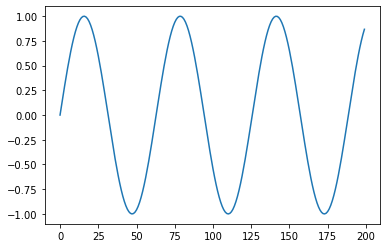

200

In [ ]:
series = np.sin(0.1 * np.arange(200))# + np.random.random(200) * 0.25
plt.plot(series)
plt.show()
len(series)

In [ ]:
X = []
Y= []
T = 3

for i in range(len(series) - T):
  X.append(series[i: i + T])
  Y.append(series[i+  T])

X = np.array(X)
Y = np.array(Y)
N = len(X)
X.shape

(197, 3)

In [ ]:
split = len(X)//2
X_training = X[:split]
Y_training = Y[:split]

X_validation = X[split:]
Y_validation = Y[split:]

X_training.shape

(98, 3)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=(T,))
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.05), loss='mse')

stopper = tf.keras.callbacks.EarlyStopping(patience=10)

epochs=100
history = model.fit(X_training, Y_training, 
                    epochs=epochs, 
                    validation_data=(X_validation, Y_validation),
                    callbacks=[])

Epoch 1/100
4/4 [==============================] - 0s 40ms/step - loss: 4.4089 - val_loss: 3.5522
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 2.7831 - val_loss: 2.3448
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1.6527 - val_loss: 1.4120
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9089 - val_loss: 0.7826
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4745 - val_loss: 0.3701
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2132 - val_loss: 0.1631
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1162 - val_loss: 0.0761
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0824 - val_loss: 0.0501
Epoch 9/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0757 - val_loss: 0.0473
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0717 - val_loss: 0.0528
Epoch 11/100
4/4 [=======

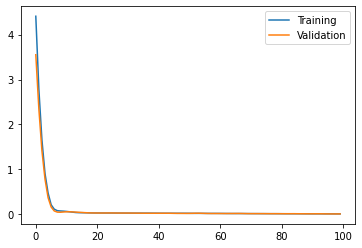

In [ ]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()

In [ ]:
wrong_predictions =  model.predict(X_validation)
wrong_predictions = wrong_predictions.squeeze()
wrong_predictions.shape

(99,)

In [ ]:
correct_predictions = []
window = X_training[-1]
for features in X_validation:
  prediction = model.predict(np.expand_dims(window, axis=0))
  correct_predictions.append(prediction[0,0])
  window = np.roll(window, -1)
  window[-1] = prediction
correct_predictions = np.array(correct_predictions)
correct_predictions.shape

(99,)

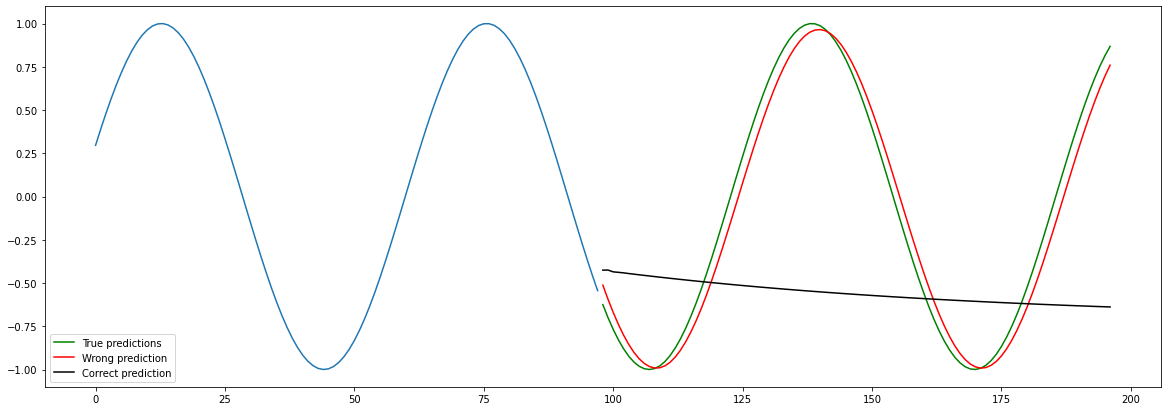

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(split), Y_training)
plt.plot(range(split, len(series) - T), Y_validation, label="True predictions", color='green')
plt.plot(range(split, len(series) - T), wrong_predictions, label="Wrong prediction", color='red')
plt.plot(range(split, len(series) - T), correct_predictions, label="Correct prediction", color='black')
plt.legend()
plt.show()

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_6/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[0.15129384],
        [0.09489181],
        [0.7350976 ]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([-0.01340747], dtype=float32)>]